In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('seaborn-whitegrid')

In [49]:
sigma = (1, -1) ## sample space of spins
#make a lattice
L = 5 #length
N = L**2 #total spins
T = 4 #temperature in units of T_c

lattice = np.zeros((L, L))

for i in range(L):
    for j in range(L):
        lattice[i,j] = np.random.choice(sigma)

# def plot_lattice(lattic):
#     for i in range(L):
#         for j in range(L):
#             color = 'r' if lattic[i][j] == 1 else 'b'
#             plt.plot(i,j,'.', color=color)
#             plt.axis('equal')

# plot_lattice(lattice)

In [7]:
#energy of one spin
def H(i,j):
    return -lattice[i%L, j%L]*(lattice[(i+1)%L, j%L] +
                        lattice[(i-1)%L, j%L] +
                        lattice[(i)%L, (j+1)%L]+
                        lattice[(i)%L, (j-1)%L])
    

In [9]:
def E(): #tota(l energy of the lattice(normalised)
    s = 0
    l= 0 #mganetica monment 
    for i in range(L):
        for j in range(L):
            s += H(i,j)
            l += lattice[i,j]
    
    
    return (s/2), l/N

#magnetic moment per spin

In [52]:
def flip(i,j):

    #energy before flipping
    E1 = H(i,j)

    #trial flip
    lattice[i,j] *= -1

    E2 = H(i,j) #energy after flipping 

    dE = E2-E1

    accept = 0 #flag 
    
    rand = np.random.uniform(0,1)
    if dE<0 or rand<np.exp(-dE/T):
        accept = 1
    
    if not accept:
        lattice[i,j] *= -1
    


In [53]:
steps = 3500 #total steps
energy_list = []
m_list = []

def mc_step():
    for _ in range(N):
        i = np.random.randint(L)
        j = np.random.randint(L)

        flip(i,j)

def experiment(steps):
    for i in tqdm(range(steps)):
        mc_step()
        m, e = E()
        m_list.append(m)
        energy_list.append(e)

In [54]:
experiment(steps)

100%|██████████| 3500/3500 [01:01<00:00, 57.31it/s]


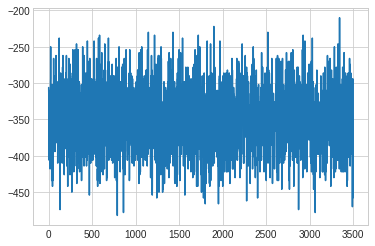

In [55]:
plt.plot(m_list)

(-1.0, 1.0)

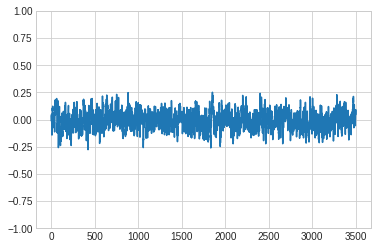

In [56]:
plt.plot(energy_list)
plt.ylim(-1,1)

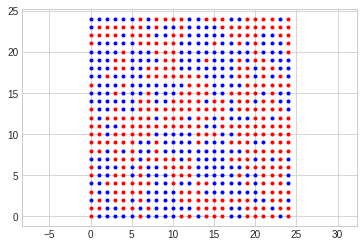

In [57]:
plot_lattice(lattice)

In [45]:
k = np.array(m_list)    

In [46]:
k[500:].mean()

-2.22452e+02

In [16]:
sigma = (1, -1) ## sample space of spins
#make a lattice

def monte_carlo(L, T, steps, initial=(-1,1)):
#length
    sigma = initial
    N = L**2 #total spins
    #temperature in units of T_c
    global lattice
    lattice = np.zeros((L, L))

    for i in range(L):
        for j in range(L):
            lattice[i,j] = np.random.choice(sigma)

    def flip(i,j, T):

        #energy before flipping
        E1 = H(i,j)

        #trial flip
        lattice[i,j] *= -1

        E2 = H(i,j) #energy after flipping 

        dE = E2-E1

        accept = 0 #flag 
        
        rand = np.random.uniform(0,1)
        if dE<0 or rand<np.exp(-dE/T):
            accept = 1
        
        if not accept:
            lattice[i,j] *= -1

    energy_list = []
    m_list = []

    def mc_step():
        for _ in range(N):
            i = np.random.randint(L)
            j = np.random.randint(L)

            flip(i,j, T)

    def experiment(steps):
        for i in tqdm(range(steps)):
            mc_step()
            e, m = E()
            m_list.append(m)
            energy_list.append(e)

    experiment(steps)
    return m_list, energy_list

In [17]:
m_list, e_list =  monte_carlo(35, 2,3000)

  0%|          | 0/3000 [00:00<?, ?it/s]


NameError: name 'L' is not defined

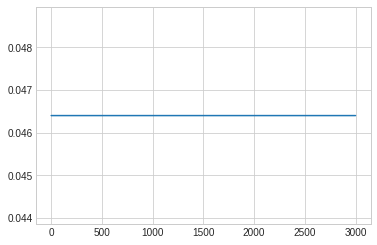

In [64]:
plt.plot(m_list)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('seaborn-whitegrid')

class monte_carlo:
    def __init__(self, L, T,steps, initial):
        self.L = L
        self.T = T
        self.initial = initial
        self.steps = steps

        self.sigma = self.initial
        self.N = self.L**2 #total spins
        #temperature in units of T_c
       
        self.lattice = np.zeros((self.L, self.L))

        for i in range(self.L):
            for j in range(self.L):
                self.lattice[i,j] = np.random.choice(self.sigma)

        self.energy_list = []
        self.m_list = []

    def E(self): #tota(l energy of the lattice(normalised)
        s = 0
        l= 0 #mganetica monment 
        for i in range(self.L):
            for j in range(self.L):
                s += self.H(i,j)
                l += self.lattice[i,j]
        
        
        return (s/2), l/self.N

    def H(self,i,j):
        return -self.lattice[i%self.L, j%self.L]*(self.lattice[(i+1)%self.L, j%self.L] +
                        self.lattice[(i-1)%self.L, j%self.L] +
                        self.lattice[(i)%self.L, (j+1)%self.L]+
                        self.lattice[(i)%self.L, (j-1)%self.L])
    
    def flip(self,i,j):

        #energy before flipping
        E1 = self.H(i,j)

        #trial flip
        self.lattice[i,j] *= -1

        E2 = self.H(i,j) #energy after flipping 

        dE = E2-E1

        accept = 0 #flag 
        
        rand = np.random.uniform(0,1)
        if dE<0 or rand<np.exp(-dE/self.T):
            accept = 1
        
        if not accept:
            self.lattice[i,j] *= -1

    
        
    def mc_step(self):
        for _ in range(self.N):
            i = np.random.randint(self.L)
            j = np.random.randint(self.L)

            self.flip(i,j)

    def experiment(self):
        for i in tqdm(range(self.steps)):
            self.mc_step()
            e, m = self.E()
            self.m_list.append(m)
            self.energy_list.append(e)

In [24]:
monte_c = monte_carlo(35, 20, 2000, (1,-1))
monte_c.experiment()

100%|██████████| 2000/2000 [01:12<00:00, 27.77it/s]


(-1.0, 1.0)

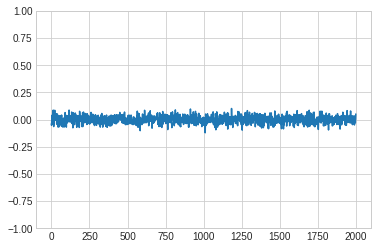

In [25]:
plt.plot(monte_c.m_list)
plt.ylim(-1,1)

(-9800.0, 9800.0)

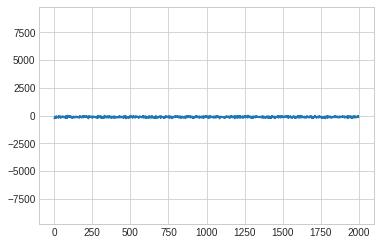

In [23]:
plt.plot(monte_c.energy_list)
plt.ylim(-8*35*35,8*35*35)

In [28]:
k = monte_c.m_list[500:]
sum(k)/len(k)

-1.3061224489796634e-05

In [68]:
ts = np.linspace(1, 4, 20)

In [69]:
ts

array([1.        , 1.15789474, 1.31578947, 1.47368421, 1.63157895,
       1.78947368, 1.94736842, 2.10526316, 2.26315789, 2.42105263,
       2.57894737, 2.73684211, 2.89473684, 3.05263158, 3.21052632,
       3.36842105, 3.52631579, 3.68421053, 3.84210526, 4.        ])

In [70]:
ms = []
for t in ts:
    monte_c = monte_carlo(35, t, 2000, (1,1))
    monte_c.experiment()
    k = monte_c.m_list[500:] #let's say it reachs eqbm after 500 steps so we are taking avarage after that only
    ms.append(sum(k)/len(k))

100%|██████████| 2000/2000 [01:17<00:00, 25.94it/s]


In [103]:
ts2 = np.linspace(2.26, 2.5, 5)
ms2 = []
for t in ts2:
    monte_c = monte_carlo(35, t, 2000, (1,1))
    monte_c.experiment()
    k = monte_c.m_list[500:] #let's say it reachs eqbm after 500 steps so we are taking avarage after that only
    ms2.append(sum(k)/len(k))

100%|██████████| 2000/2000 [01:14<00:00, 26.85it/s]


Text(0, 0.5, 'm')

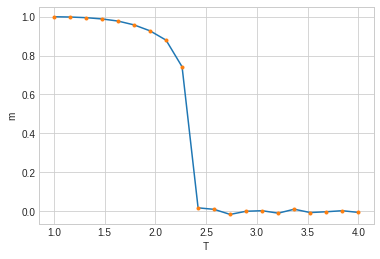

In [102]:
plt.plot(ts, ms)
plt.plot(ts, ms, '.')
plt.xlabel('T')
plt.ylabel('m')

In [105]:
ms3 = list(ms)+list(ms2)
ts3 = list(ts)+list(ts2)

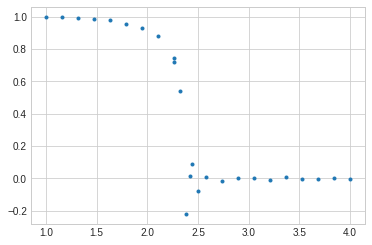

In [106]:
plt.plot(ts3, ms3, '.')

In [96]:
ts2 = list(ts2)
ts2.pop(1)
ms2.pop()

-0.11767619047619056

In [95]:
ts2

[2.26, 2.32, 2.5]

In [1]:
from ising_model import monte_carlo

In [2]:
import numpy as np

In [4]:
x = np.array((1,2,3,4,5,5,6))

In [6]:
x[3:].mean()

5.0